# Capstone, Part 2

This dataset is provided by [healthdata.gov](https://healthdata.gov/dataset/influenza-laboratory-confirmed-cases-county-beginning-2009-10-season) and originates from [health.ny.gov](https://www.health.ny.gov/diseases/communicable/influenza/surveillance/). Dataset can be found on my github or [here](https://healthdata.gov/dataset/influenza-laboratory-confirmed-cases-county-beginning-2009-10-season). 

This dataset contains:
* Season (Flu season ranging from October through the following May. For example, 2013-2014 means October 2013 - May 2014)
* Region in NY State (Region of lab-confirmed cases. For example, Madison county is in the Central region of NY ![](Madison County Loc.jpg)
* County (County in NY, for example, Madison County pictured above)
* CDC Week (week number in season)
* Week Ending Date
* Disease (Influenza Strain - A or B)
* Count (number of cases)
* County Centroid (map coordinates)
* FIPS (Federal Information Processing Standard - five digit FIPS code that uniquely identifies county and county equivalents in the United States)

# Exploratory Data Analysis (Prelim)
1. Import the dataset
2. Preliminary Exploratory Data Analysis:
    * Clean the data (if necessary)
    * know the data types and variable types (continuous, discrete, categorical)
    * Get summary statistics
    * Understand how data is distributed at first glance
    * Learn the shape and size of the data
    * Play around with visualizations and visualize subsets

## 1. Import the dataset, and learn more about it!

In [92]:
import pandas as pd
import numpy as np

flucases = pd.read_csv("flucases.csv")
flucases.head()

,Season,Region,County,CDC Week,Week Ending Date,Disease,Count,County Centroid,FIPS
0,2013-2014,WESTERN,SENECA,10,03/08/2014,INFLUENZA_B,0,"(42.7652, -76.8721)",36099
1,2011-2012,CAPITAL DISTRICT,HAMILTON,41,10/15/2011,INFLUENZA_B,0,"(43.6578786, -74.5024556)",36041
2,2009-2010,CENTRAL,JEFFERSON,48,12/05/2009,INFLUENZA_A,3,"(44.0607, -75.9928)",36045
3,2010-2011,CENTRAL,MADISON,51,12/25/2010,INFLUENZA_A,0,"(42.9100255, -75.6635749)",36053
4,2013-2014,CAPITAL DISTRICT,DELAWARE,19,05/10/2014,INFLUENZA_A,1,"(42.1939865, -74.966728)",36025


Identify the shape (number of rows, number of columns) of the dataset.

In [93]:
flucases.shape

(62286, 9)

As shown by the shape, this dataset had 62,286 rows and 9 columns. Let's take a look at the summary statistics.

In [94]:
flucases.describe()

,CDC Week,Count,FIPS
count,62286.000000,62286.000000,62286.000000
mean,25.177825,9.296937,36063.378095
std,18.287463,47.650234,35.593393
min,1.000000,0.000000,36001.000000
25%,9.000000,0.000000,36033.000000
50%,18.000000,0.000000,36065.000000
75%,45.000000,2.000000,36095.000000
max,53.000000,1409.000000,36123.000000


Before cleaning/ preparing the data, the summary statistics can be seen above. 

FIPS is a code, so the summary statistics on this is not important, as it is technically a categorical variable.

Now I will look at the information on the dataset, and identify the data types.

In [95]:
flucases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62286 entries, 0 to 62285
Data columns (total 9 columns):
Season              62286 non-null object
Region              62286 non-null object
County              62286 non-null object
CDC Week            62286 non-null int64
Week Ending Date    62286 non-null object
Disease             62286 non-null object
Count               62286 non-null int64
County Centroid     62286 non-null object
FIPS                62286 non-null int64
dtypes: int64(3), object(6)
memory usage: 4.3+ MB


The only columns that are not objects are the CDC Week, Count, and FIPS - all of which are integers.

Let's check for missing values!

In [96]:
flucases.isna().sum()

Season              0
Region              0
County              0
CDC Week            0
Week Ending Date    0
Disease             0
Count               0
County Centroid     0
FIPS                0
dtype: int64

Sometimes, datasets have "?" where the data is unknown, so first I will convert these values (if any) to NaN.

In [97]:
flucases.replace("?", np.NaN, inplace=True)
flucases.isna().sum()

Season              0
Region              0
County              0
CDC Week            0
Week Ending Date    0
Disease             0
Count               0
County Centroid     0
FIPS                0
dtype: int64

Great! No missing values here.

[Terence Shin](https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e) [3] demonstrated a good way to identify the unique values. This will show what variables we can expect from each column (most importantly, for categorical variables). Additionally, it will reveal any NaN-equivalent values a dataset may contain. 


In [98]:
# better understand different values for each variable
flucases.nunique(axis=0)
flucases.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,CDC Week,Count,FIPS
count,62286.000000,62286.000000,62286.000000
mean,25.177825,9.296937,36063.378095
std,18.287463,47.650234,35.593393
min,1.000000,0.000000,36001.000000
25%,9.000000,0.000000,36033.000000
50%,18.000000,0.000000,36065.000000
75%,45.000000,2.000000,36095.000000
max,53.000000,1409.000000,36123.000000


* `.nunique(axis=0)` returns the number of unique values for each variable
* `.describe()` summarizes the count, mean, std, etc (everything shown earlier).
* The remaining code in the cell above formats each row to a regular format and suppresses scientific notation (though this may not be needed here, it is good practice in preliminary EDA [[4](https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e)].

So far... this makes sense. It is reasonable for at some point in time (perhaps in the very beginning of the season at an instance in time, there are no reported flu cases, indicated in `Count`). Visualizing the distribution will be more useful, and visualizing the data will help identify outliers. 

In [99]:
# Making a dataframe so the columns are easier to use
df = flucases
df = df.rename(columns = {"CDC Week":"CDC_Week", "Week Ending Date":"Week_Ending_Date",
                    "County Centroid":"County_Centroid"})
df.head(5)

,Season,Region,County,CDC_Week,Week_Ending_Date,Disease,Count,County_Centroid,FIPS
0,2013-2014,WESTERN,SENECA,10,03/08/2014,INFLUENZA_B,0,"(42.7652, -76.8721)",36099
1,2011-2012,CAPITAL DISTRICT,HAMILTON,41,10/15/2011,INFLUENZA_B,0,"(43.6578786, -74.5024556)",36041
2,2009-2010,CENTRAL,JEFFERSON,48,12/05/2009,INFLUENZA_A,3,"(44.0607, -75.9928)",36045
3,2010-2011,CENTRAL,MADISON,51,12/25/2010,INFLUENZA_A,0,"(42.9100255, -75.6635749)",36053
4,2013-2014,CAPITAL DISTRICT,DELAWARE,19,05/10/2014,INFLUENZA_A,1,"(42.1939865, -74.966728)",36025


Let's take a look at all of the unique variables!

In [100]:
# Ones that are comments have lengthy outputs, but feel free to check them out if you feel like it
print("Season Variables", df.Season.unique())
print("")
print("Region Variables", df.Region.unique())
print("")
print("County Variables", df.County.unique())
print("")
print("CDC Week Variables", df.CDC_Week.unique())
print("")
# print("Week Ending Date Variables", df.Week_Ending_Date.unique()) this is a long one
print("")
print("Disease Variables", df.Disease.unique())
print("")
# print("Count Variables", df.Count.unique()) this might be long, so will look at later
# print("County Centroid Variables", df.County_Centroid.unique())
print("")
# print("FIPS Variables", df.FIPS.unique())

Season Variables ['2013-2014' '2011-2012' '2009-2010' '2010-2011' '2012-2013' '2014-2015'
 '2016-2017' '2015-2016' '2018-2019' '2017-2018' '2019-2020']

Region Variables ['WESTERN' 'CAPITAL DISTRICT' 'CENTRAL' 'METRO' 'NYC']

County Variables ['SENECA' 'HAMILTON' 'JEFFERSON' 'MADISON' 'DELAWARE' 'CHEMUNG' 'FULTON'
 'SULLIVAN' 'SCHOHARIE' 'ROCKLAND' 'ESSEX' 'KINGS' 'SCHENECTADY'
 'COLUMBIA' 'ALBANY' 'FRANKLIN' 'ST LAWRENCE' 'WASHINGTON' 'WESTCHESTER'
 'PUTNAM' 'BRONX' 'DUTCHESS' 'NEW YORK' 'CHENANGO' 'GENESEE' 'NASSAU'
 'CATTARAUGUS' 'ORANGE' 'LEWIS' 'CHAUTAUQUA' 'ONONDAGA' 'ERIE' 'GREENE'
 'OTSEGO' 'WYOMING' 'CORTLAND' 'NIAGARA' 'STEUBEN' 'MONTGOMERY' 'ORLEANS'
 'RICHMOND' 'SARATOGA' 'TIOGA' 'OSWEGO' 'MONROE' 'ONEIDA' 'CLINTON'
 'ULSTER' 'QUEENS' 'RENSSELAER' 'BROOME' 'SUFFOLK' 'LIVINGSTON' 'WAYNE'
 'TOMPKINS' 'ALLEGANY' 'YATES' 'ONTARIO' 'CAYUGA' 'HERKIMER' 'WARREN'
 'SCHUYLER']

CDC Week Variables [10 41 48 51 19 18 50 47 11  8 49 17  1 43 46  6  2 12 14 42 52 20 15 40
  9 16 45  3  

Note how there are three variables for Disease: Influenza A, B or **unspecified**. My question is - if these are lab confirmed cases, why would the strain be unpecified? This is certainly something I need to look into.

Now I want to simply look at the number of unique variables for each feature.

In [101]:
print("Number of Unique Season Variables:", df.Season.nunique())
print("")
print("Number of Unique Region Variables:", df.Region.nunique())
print("")
print("Number of Unique County Variables:", df.County.nunique())
print("")
print("Number of Unique CDC Week Variables:", df.CDC_Week.nunique())
print("")
print("Number of Unique Week Ending Date Variables:", df.Week_Ending_Date.nunique())
print("")
print("Number of Unique Disease Variables:", df.Disease.nunique())
print("")
print("Number of Unique Count Variables:", df.Count.nunique()) 
print("")
print("Number of Unique County Centroid Variables:", df.County_Centroid.nunique())
print("")
print("Number of Unique FIPS Variables:", df.FIPS.nunique())

Number of Unique Season Variables: 11

Number of Unique Region Variables: 5

Number of Unique County Variables: 62

Number of Unique CDC Week Variables: 34

Number of Unique Week Ending Date Variables: 347

Number of Unique Disease Variables: 3

Number of Unique Count Variables: 530

Number of Unique County Centroid Variables: 62

Number of Unique FIPS Variables: 62


**Note** how the number of unique County, Centroid, and FIPS variables are the same. This is good, because they all represent a single county, meaning there are 62 counties. If these numbers were different, there would be an issue (i.e. a missing value in one or more of the columns - which could be fixed easily, but is important to check).

One important step in EDA is identifying whether our features are continuos, discrete, or categorical. This is simple, and if you don't know the difference, it is simple to google! 

* Season: Discrete
* Region: Categorical
* County: Categorical
* CDC Week: Discrete
* Week Ending Date: Discrete
* Disease: Categorical
* Count: Discrete (Why? Because it is an integer and can only be an integer! There cannot be 1.2 humans with confirmed influenza)
* County Centroid: Continuous
* FIPS: Categorical

I came across code from [Pierre Sadrach](https://medium.com/swlh/analyzing-county-level-cdc-flu-data-in-python-8518dd8c43c7) that performs EDA on this same dataset. This article defines a function that takes a data frame, column name, and limit as an input, and prints a dictionary of categorical values and their frequency.[[4](https://medium.com/swlh/analyzing-county-level-cdc-flu-data-in-python-8518dd8c43c7)]

He also provides code that defines a function to return summary statistics for each county. 

I'll use this code for showing county level summary statistics, and the counter, but will analyze other subsets on my own. 

In [102]:
import collections
from collections import Counter

In [103]:
def return_counter(data_frame, column_name, limit):
    print(dict(Counter(data_frame[column_name].values).most_common(limit)))

# Apply this function to the County column, limiting the results to the
# ten most common values.

return_counter(df, 'County', 10)

{'SENECA': 1041, 'MADISON': 1041, 'SULLIVAN': 1041, 'SCHOHARIE': 1041, 'ROCKLAND': 1041, 'KINGS': 1041, 'SCHENECTADY': 1041, 'ST LAWRENCE': 1041, 'WASHINGTON': 1041, 'WESTCHESTER': 1041}


All counties have the same number of records, which is good, but will check the entire dictionary.

In [104]:
def return_counter(data_frame, column_name):
    from collections import Counter    
    print(dict(Counter(data_frame[column_name].values)))

In [105]:
# Return new return_counter function
return_counter(df, 'County')

{'SENECA': 1041, 'HAMILTON': 939, 'JEFFERSON': 939, 'MADISON': 1041, 'DELAWARE': 939, 'CHEMUNG': 939, 'FULTON': 939, 'SULLIVAN': 1041, 'SCHOHARIE': 1041, 'ROCKLAND': 1041, 'ESSEX': 939, 'KINGS': 1041, 'SCHENECTADY': 1041, 'COLUMBIA': 939, 'ALBANY': 939, 'FRANKLIN': 939, 'ST LAWRENCE': 1041, 'WASHINGTON': 1041, 'WESTCHESTER': 1041, 'PUTNAM': 1041, 'BRONX': 1041, 'DUTCHESS': 939, 'NEW YORK': 1041, 'CHENANGO': 939, 'GENESEE': 939, 'NASSAU': 1041, 'CATTARAUGUS': 939, 'ORANGE': 1041, 'LEWIS': 1029, 'CHAUTAUQUA': 939, 'ONONDAGA': 1041, 'ERIE': 939, 'GREENE': 939, 'OTSEGO': 1041, 'WYOMING': 1041, 'CORTLAND': 939, 'NIAGARA': 1041, 'STEUBEN': 1041, 'MONTGOMERY': 1041, 'ORLEANS': 1041, 'RICHMOND': 1041, 'SARATOGA': 1041, 'TIOGA': 1041, 'OSWEGO': 1041, 'MONROE': 1041, 'ONEIDA': 1041, 'CLINTON': 939, 'ULSTER': 1041, 'QUEENS': 1041, 'RENSSELAER': 1041, 'BROOME': 939, 'SUFFOLK': 1041, 'LIVINGSTON': 1041, 'WAYNE': 1041, 'TOMPKINS': 1041, 'ALLEGANY': 939, 'YATES': 1041, 'ONTARIO': 1041, 'CAYUGA': 939,

Counties have either 1041 or 939 records. Now I will apply this function to the Disease column.

In [106]:
return_counter(df, 'Disease')

{'INFLUENZA_B': 20762, 'INFLUENZA_A': 20762, 'INFLUENZA_UNSPECIFIED': 20762}


20,762 unspecified flu cases. I am still not sure if I should remove the unspecified cases.

The source cited above defines a function that takes a df, a categorical and numerical colum. The mean and sd of the numerical column for each category will be stored in a dataframe and will be sorted in descending order with respect to the mean. This will help with identifying categories with higher/lower means or standard deviations for a given numerical column. This code is from [[source 4](https://medium.com/swlh/analyzing-county-level-cdc-flu-data-in-python-8518dd8c43c7)]

In [107]:
def return_statistics(data_frame, categorical_column, numerical_column):
    mean = []
    std = []
    field = []
    for i in set(list(data_frame[categorical_column].values)):
        new_data = data_frame[data_frame[categorical_column] == i]
        field.append(i)
        mean.append(new_data[numerical_column].mean())
        std.append(new_data[numerical_column].std())
    df = pd.DataFrame({'{}'.format(categorical_column): field, 'mean {}'.format(numerical_column): mean, 'std in {}'.format(numerical_column): std})
    df.sort_values('mean {}'.format(numerical_column), inplace = True, ascending = False)
    df.dropna(inplace = True)
    return df

In [108]:
# Look at summary statistics for County and Count
sum_stats = return_statistics(df, 'County', 'Count')
print(sum_stats.head(20))

         County  mean Count  std in Count
35       QUEENS   56.145053    154.922881
33        BRONX   55.832853    153.846542
51        KINGS   49.337176    148.567469
55      SUFFOLK   38.211335     94.802505
7        NASSAU   37.706052     87.722235
50  WESTCHESTER   35.200768     90.065751
46       MONROE   33.967339     93.078260
3      NEW YORK   28.772334     71.684304
23         ERIE   22.892439     67.592029
38     ONONDAGA   17.941402     46.240461
14       ONEIDA   17.635927     49.673560
41       ORANGE    9.899135     25.534675
29       BROOME    9.443024     29.540109
57     RICHMOND    8.455331     23.474622
28     SARATOGA    8.443804     22.557724
10       ALBANY    6.783813     18.029031
36  SCHENECTADY    6.697406     20.253530
4      DUTCHESS    6.565495     17.509751
5        OSWEGO    6.435159     18.312666
39     ROCKLAND    6.273775     18.787398


### Observations on summary statistics
Queens county has the highest mean _and_ standard deviation in the number of confirmed influenza cases.

Now I would like to make subsets and play around with the data, and make some basic visualizations. First I want to look at Queens county, because this county has the highest mean and standard deviation!

In [111]:
# making a subset:

subset_queens = df.loc[(df["County"]=="QUEENS")]
subset_queens.head()


,Season,Region,County,CDC_Week,Week_Ending_Date,Disease,Count,County_Centroid,FIPS
103,2011-2012,NYC,QUEENS,41,10/15/2011,INFLUENZA_A,0,"(40.7282, -73.7949)",36081
371,2010-2011,NYC,QUEENS,13,04/02/2011,INFLUENZA_UNSPECIFIED,0,"(40.7282, -73.7949)",36081
372,2012-2013,NYC,QUEENS,19,05/11/2013,INFLUENZA_UNSPECIFIED,0,"(40.7282, -73.7949)",36081
428,2009-2010,NYC,QUEENS,4,01/30/2010,INFLUENZA_B,1,"(40.7282, -73.7949)",36081
472,2010-2011,NYC,QUEENS,11,03/19/2011,INFLUENZA_B,27,"(40.7282, -73.7949)",36081


In [112]:
# We know the county, and location information, and at this point,
# I am interested in the distribution because Queens county has the highest
# mean and standard deviation in the number of confirmed flu cases

subset_queens = subset_queens[["Season", "CDC_Week", "Week_Ending_Date",
                              "Disease", "Count"]]

In [113]:
subset_queens.head()

,Season,CDC_Week,Week_Ending_Date,Disease,Count
103,2011-2012,41,10/15/2011,INFLUENZA_A,0
371,2010-2011,13,04/02/2011,INFLUENZA_UNSPECIFIED,0
372,2012-2013,19,05/11/2013,INFLUENZA_UNSPECIFIED,0
428,2009-2010,4,01/30/2010,INFLUENZA_B,1
472,2010-2011,11,03/19/2011,INFLUENZA_B,27


In [114]:
subset_queens["Count"].describe()

count    1041.000000
mean       56.145053
std       154.922881
min         0.000000
25%         0.000000
50%         3.000000
75%        25.000000
max      1213.000000
Name: Count, dtype: float64

In [115]:
# What about Seasons?
subset_queens.sort_values(by=['Season','CDC_Week'], inplace=True)

In [23]:
print(subset_queens.head())
print(subset_queens.tail())

          Season  CDC_Week Week_Ending_Date                Disease  Count
5059   2009-2010         1       01/09/2010  INFLUENZA_UNSPECIFIED      0
10915  2009-2010         1       01/09/2010            INFLUENZA_B      0
14951  2009-2010         1       01/09/2010            INFLUENZA_A     49
20535  2009-2010         2       01/16/2010            INFLUENZA_B      0
27181  2009-2010         2       01/16/2010  INFLUENZA_UNSPECIFIED      0
          Season  CDC_Week Week_Ending_Date                Disease  Count
60042  2019-2020        51       12/21/2019  INFLUENZA_UNSPECIFIED      1
61568  2019-2020        51       12/21/2019            INFLUENZA_A    419
58313  2019-2020        52       12/28/2019  INFLUENZA_UNSPECIFIED      0
60094  2019-2020        52       12/28/2019            INFLUENZA_A    858
61290  2019-2020        52       12/28/2019            INFLUENZA_B    670


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

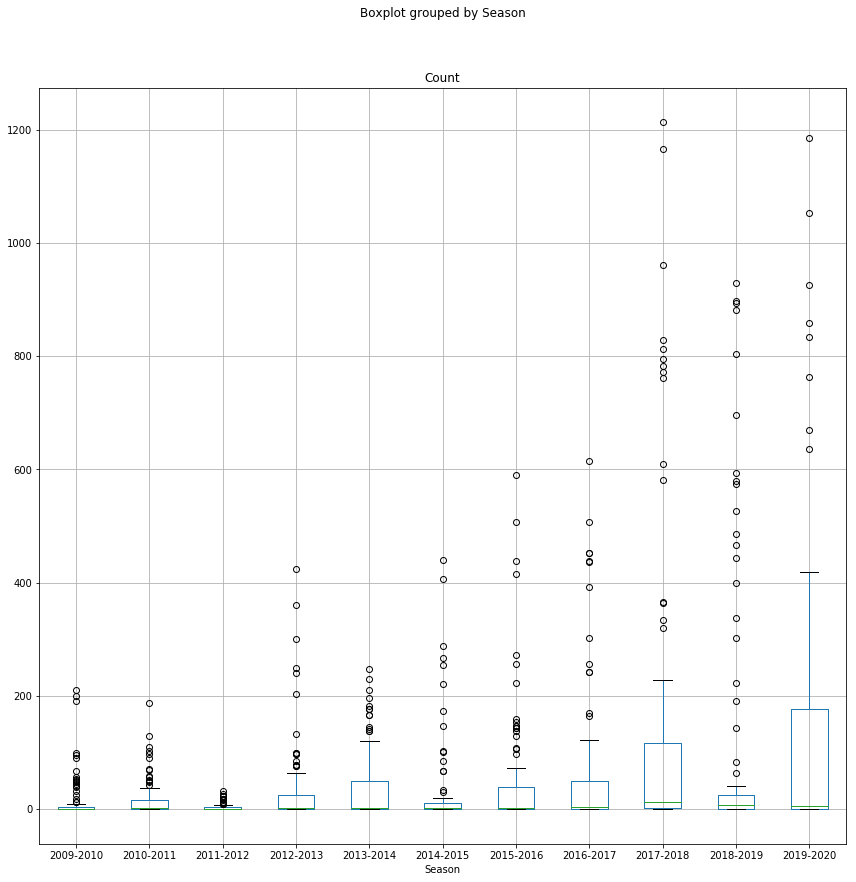

In [25]:
subset_queens.boxplot(by = 'Season', column = ['Count'], figsize = (14,14))

In [26]:
# There seems to be plenty of outliers at a glance. Perhaps the higher
# counts are at the peak of the season.

# look at season for entire data set (not paying attention to counties)

In [27]:
df_season_counts = df[["Season", "Count"]]

df_season_counts.sort_values(by=['Season'], inplace=True)

df_season_counts.head()

C:\Users\kathu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Season,Count
13332,2009-2010,0
12746,2009-2010,0
12748,2009-2010,0
12759,2009-2010,0
28760,2009-2010,0


In [28]:
df_season_counts.tail()

,Season,Count
59638,2019-2020,21
59639,2019-2020,4
59640,2019-2020,0
59628,2019-2020,0
62285,2019-2020,0


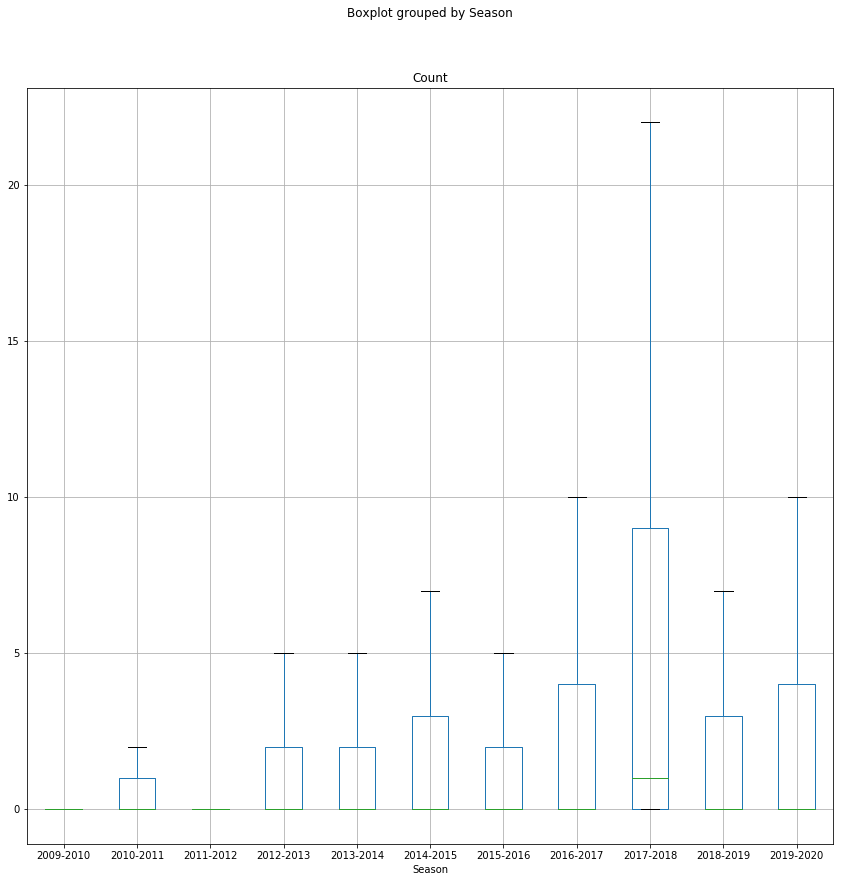

In [29]:
df_season_counts.boxplot(by = 'Season', column = ['Count'], figsize = (14,14),showfliers = False)

Box plots are not looking right. This probably will require more work if I need box plots in the future, but another option to visualize my data is through sns barplots. I will look at barplots for confirmed flu cases across all of New York State, as well as Qeens, New York. 

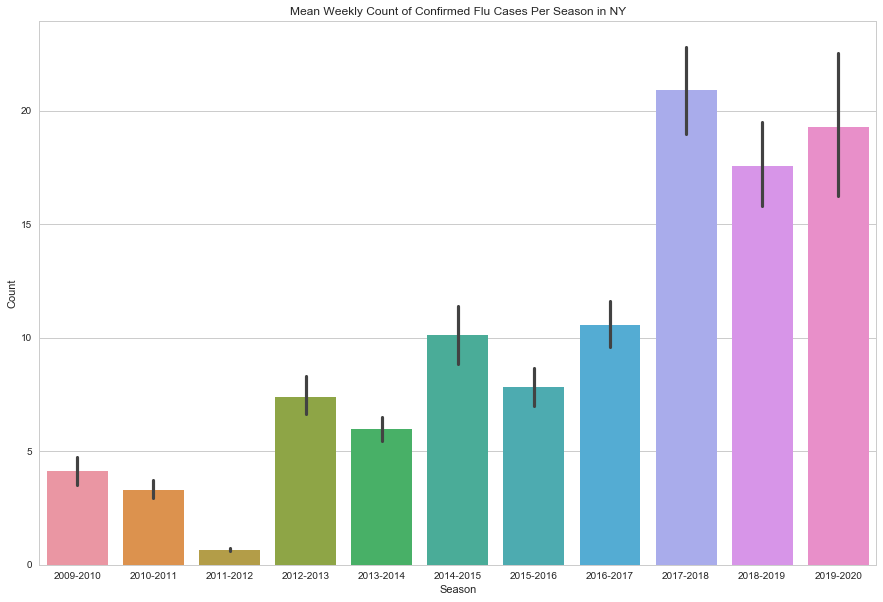

In [85]:
sns.set(style = "whitegrid")
data = df_season_counts
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
ax = sns.barplot(x = "Season", y = "Count", data = data).set_title("Mean Weekly Count of Confirmed Flu Cases Per Season in NY")


This reveals the count mean and standard deviation (lines), so I want to make sure the actual counts/sum of confirmed cases per season also reflects this. Below I take the sum of the confirmed cases for each season, and print the result!
It also is doing it over all reports (so each county for each season will have three reports in a given week for each strain). This representation is convoluted. For this preliminary EDA, it would be best to simply visualize the total number of cases for each season. 

In [89]:
df_10 = df_season_counts.loc[(df_season_counts["Season"]=="2009-2010")]
df_10.describe()
df_10

,Season,Count
13332,2009-2010,0
12746,2009-2010,0
12748,2009-2010,0
12759,2009-2010,0
28760,2009-2010,0
12776,2009-2010,0
12782,2009-2010,0
28757,2009-2010,0
12792,2009-2010,0
12794,2009-2010,0


In [81]:
count_2020 = df_season_counts.loc[(df_season_counts["Season"] == "2019-2020")].sum(axis = 0)
count_2019 = df_season_counts.loc[(df_season_counts["Season"] == "2018-2019")].sum(axis = 0)
count_2018 = df_season_counts.loc[(df_season_counts["Season"] == "2017-2018")].sum(axis = 0)
count_2017 = df_season_counts.loc[(df_season_counts["Season"] == "2016-2017")].sum(axis = 0)
count_2016 = df_season_counts.loc[(df_season_counts["Season"] == "2015-2016")].sum(axis = 0)
count_2015 = df_season_counts.loc[(df_season_counts["Season"] == "2014-2015")].sum(axis = 0)
count_2014 = df_season_counts.loc[(df_season_counts["Season"] == "2013-2014")].sum(axis = 0)
count_2013 = df_season_counts.loc[(df_season_counts["Season"] == "2012-2013")].sum(axis = 0)
count_2012 = df_season_counts.loc[(df_season_counts["Season"] == "2011-2012")].sum(axis = 0)
count_2011 = df_season_counts.loc[(df_season_counts["Season"] == "2010-2011")].sum(axis = 0)
count_2010 = df_season_counts.loc[(df_season_counts["Season"] == "2009-2010")].sum(axis = 0)

In [82]:
print("Number of confirmed flu cases in 2009-2010 season: ", count_2010["Count"])
print("Number of confirmed flu cases in 2010-2011 season: ", count_2011["Count"])
print("Number of confirmed flu cases in 2011-2012 season: ", count_2012["Count"])
print("Number of confirmed flu cases in 2012-2013 season: ", count_2013["Count"])
print("Number of confirmed flu cases in 2013-2014 season: ", count_2014["Count"])
print("Number of confirmed flu cases in 2014-2015 season: ", count_2015["Count"])
print("Number of confirmed flu cases in 2015-2016 season: ", count_2016["Count"])
print("Number of confirmed flu cases in 2016-2017 season: ", count_2017["Count"])
print("Number of confirmed flu cases in 2017-2018 season: ", count_2018["Count"])
print("Number of confirmed flu cases in 2018-2019 season: ", count_2019["Count"])
print("Number of confirmed flu cases so far in the 2019-2020 season: ", count_2020["Count"])

Number of confirmed flu cases in 2009-2010 season:  25307
Number of confirmed flu cases in 2010-2011 season:  20328
Number of confirmed flu cases in 2011-2012 season:  4037
Number of confirmed flu cases in 2012-2013 season:  45349
Number of confirmed flu cases in 2013-2014 season:  36655
Number of confirmed flu cases in 2014-2015 season:  41186
Number of confirmed flu cases in 2015-2016 season:  48012
Number of confirmed flu cases in 2016-2017 season:  64765
Number of confirmed flu cases in 2017-2018 season:  128247
Number of confirmed flu cases in 2018-2019 season:  107805
Number of confirmed flu cases so far in the 2019-2020 season:  57378


In [83]:
data = [["2009-2010", 2537], ["2010-2011", 20328], ["2011-2012", 4037], ["2012-2013", 45349], ["2013-2014", 36655],
        ["2014-2015", 41186], ["2015-2016", 48012], ["2016-2017", 64765], ["2017-2018", 128247], ["2018-2019", 107805],
        ["2019-2020", 57378]]
df = pd.DataFrame(data, columns = ['Season', 'Sum'])
df

,Season,Sum
0,2009-2010,2537
1,2010-2011,20328
2,2011-2012,4037
3,2012-2013,45349
4,2013-2014,36655
5,2014-2015,41186
6,2015-2016,48012
7,2016-2017,64765
8,2017-2018,128247
9,2018-2019,107805


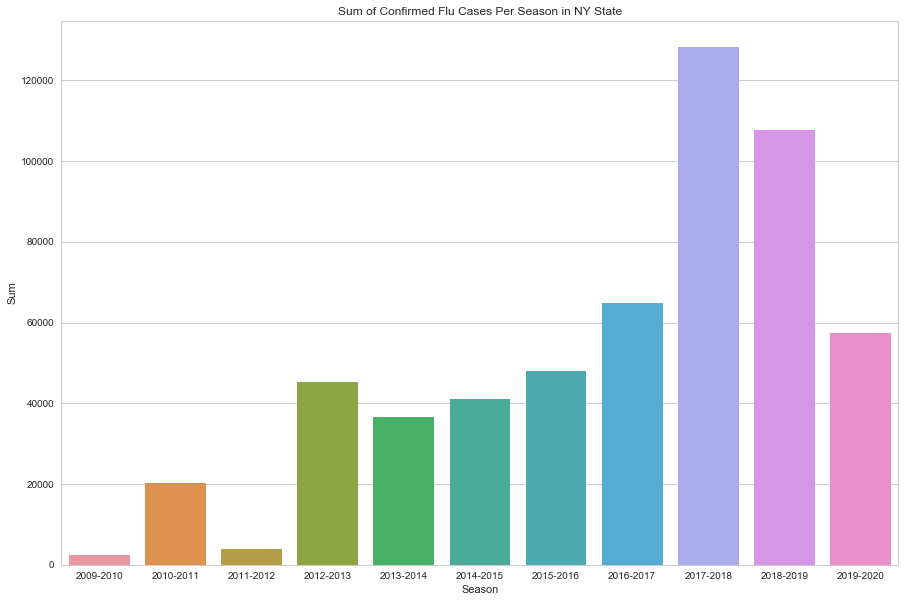

In [84]:
sns.set(style = "whitegrid")
data = df
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
ax = sns.barplot(x = "Season", y = "Sum", data = data).set_title("Sum of Confirmed Flu Cases Per Season in NY State")

This looks about right! It differs in that some weekly means will be higher and not entirely representative of the overal sum of the cases. Of course, the count for this current season (2019-2020) will be lower, because it is not over yet. This is why the barplot is helpful, because according to the mean count per cdc week, we can expect that this flu season will have a similar number of confirmed cases as 2017-2018 season. 

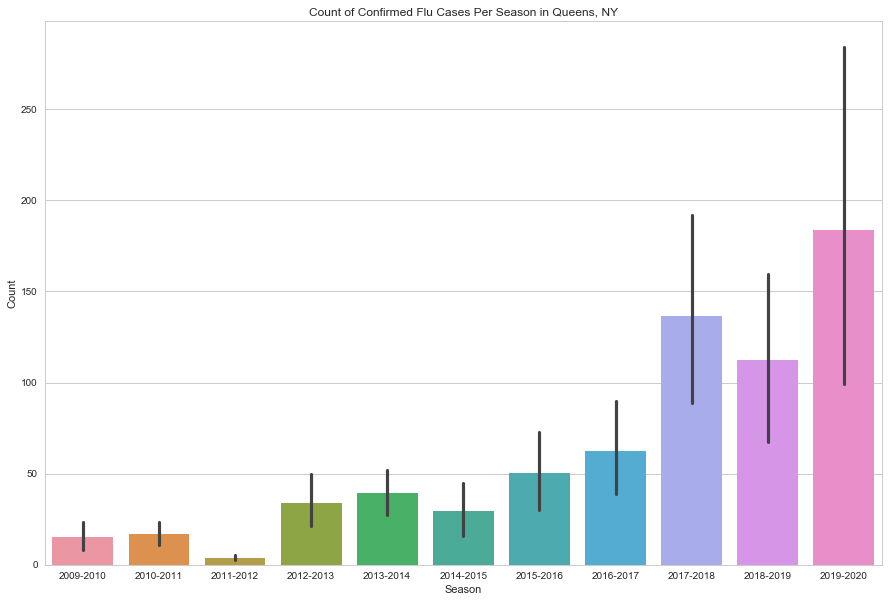

In [73]:
sns.set(style = "whitegrid")
data = subset_queens
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
ax = sns.barplot(x = "Season", y = "Count", data = data).set_title("Count of Confirmed Flu Cases Per Season in Queens, NY")

Looked at the mean count for Queens (as it had the highest mean and highest standard deviation). 

References Cited:
1. HealthData.gov. Influenza Laboratory-Confirmed Cases By County: Beginning 2009-10 Season. (2020). Retrieved from [URL](https://healthdata.gov/dataset/influenza-laboratory-confirmed-cases-county-beginning-2009-10-season) on January 15, 2020. 
2. New York State Department of Health. Influenza Activity, Surveillance, and Reports. (2020). Retrieved from [URL](https://www.health.ny.gov/diseases/communicable/influenza/surveillance/) on January 15, 2020.
3. Terence Shin. _An Extensive Step by Step Guide to Exploratory Data Analysis_. (2020). Retrieved from URL:
https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e on February 11, 2020.
4. Pierre Sadrach, Ph.D. _Analyzing County-Level Flu Data in Python_. (2020). Medium. Retrieved from [URL](https://medium.com/swlh/analyzing-county-level-cdc-flu-data-in-python-8518dd8c43c7) on February 11, 2020.